# 0. General description
Code to plott choice as a function of the lottery amount, subdivded by lottery probabilities and ambuguity levels
Edited from Ricardo's code with the same name. 


In [70]:
#Import the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os,sys



# 1. Input: 
- Patient's RAW data

- Parameters from the utility model

In [71]:
 #Specify where the data is stored in the FileShare. This is for my Laptop

#Path to the data files

#path= 'Z:/Santiago_Guardo/data' #Specify where the data is stored in the FileShare. This is for my Laptop

path = '/Volumes/UCDN/Santiago_Guardo/data' #MAC path to the File share
patient_code = 'patient1_calibration' #Specify the patient's code
patient_split_dir = os.path.join(path,'split') 
patient_trials = os.path.join(patient_split_dir,'{}/crdm/{}_crdm.csv').format(patient_code,patient_code) #This is the psychopy output CSV

#Path to the utility model data
utility_dir = os.path.join(path,'utility')
utility_analysis = os.path.join(utility_dir,'split_CRDM_analysis.csv')
parameters = pd.read_csv(utility_analysis)

print('loading fn: {}'.format(patient_trials))
print('loading fn: {}'.format(utility_analysis))

#Declare the variables we are going to be using

trials = pd.read_csv(patient_trials)
p_options = trials['crdm_lott_p'].unique()/100
p_options = p_options[~np.isnan(p_options)]  # Remove nan values ~is a logical NOT operator
p_list = p_options.tolist()  # Do we want p_options to be an array or a list? Ask Ricardo 
p_options

loading fn: /Volumes/UCDN/Santiago_Guardo/data/split/patient1_calibration/crdm/patient1_calibration_crdm.csv
loading fn: /Volumes/UCDN/Santiago_Guardo/data/utility/split_CRDM_analysis.csv


array([0.5 , 0.75, 0.25, 0.13, 0.38])

In [72]:
#df from original trials output
df =  trials[['crdm_trial_type', 'crdm_domain','crdm_sure_amt', 'crdm_lott_bot', 'crdm_lott_top', 'crdm_lott_p', 'crdm_amb_lev', 'crdm_choice', 'crdm_choice2','crdm_lott','crdm_lott2']].copy()

#filtering out practice and Nan values
df = df.loc[df['crdm_trial_type'] != 'practice']
df = df[df['crdm_choice'].notna()]

#Adding the lotterys
df['value_reward'] = df['crdm_lott_bot'] +  df['crdm_lott_top']

#Dropping unneccesary columns
df = df.drop(columns=['crdm_trial_type','crdm_lott_bot','crdm_lott_top']).reset_index(drop=True)

#Organizing
column_order = ['crdm_sure_amt', 'crdm_domain', 'crdm_lott_p','value_reward', 'crdm_amb_lev', 'crdm_choice', 'crdm_choice2', 'crdm_lott', 'crdm_lott2']
df = df[column_order]
dfgains = df.loc[df['crdm_domain'] == 'gain']
dfloss = df.loc [df['crdm_domain'] == 'loss']

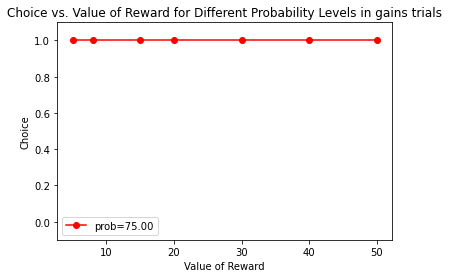

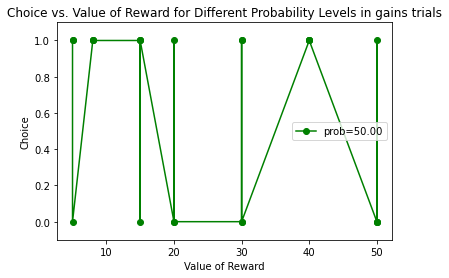

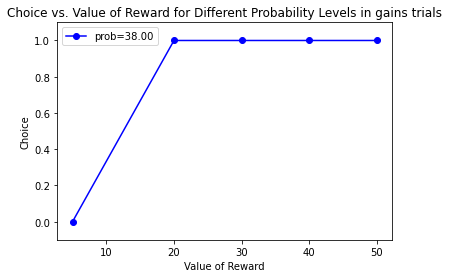

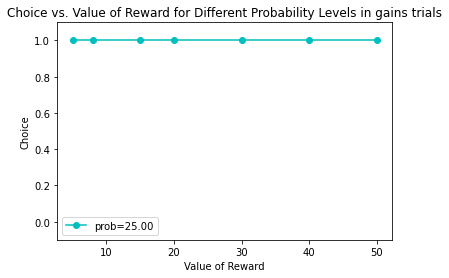

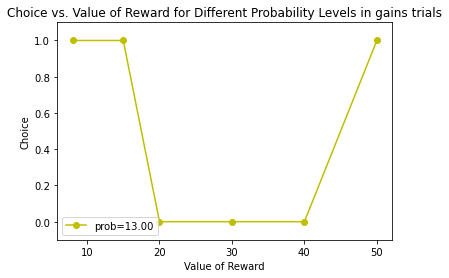

In [73]:
def plotting_raw_behavior(df, trials='gains'):
    colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k']
    probs = sorted(df['crdm_lott_p'].unique(), reverse=True)

    for i, p in enumerate(probs):
        subset_df = df[df['crdm_lott_p'] == p]
        subset_df = subset_df.sort_values(by='value_reward')  # Sort by value_reward
        x = subset_df['value_reward']
        y = subset_df['crdm_choice']

        plt.plot(x, y, '{}o-'.format(colors[i]), label='prob={0:0.2f}'.format(p))

        plt.title('Choice vs. Value of Reward for Different Probability Levels in {} trials'.format(trials))
        plt.xlabel('Value of Reward')
        plt.ylabel('Choice')
        plt.ylim([-0.1,1.1])  # Set y-axis limits to 0 and 1
        plt.legend()
        plt.show()

plotting_raw_behavior(dfgains, trials='gains')

In [74]:
#Defining count_tuples() function to return the unique items and their frequencies 
def count_tuples(listA):
  unique_items = list(set(listA))
  item_count = [listA.count(item) for item in unique_items]
  return unique_items,item_count

def tabulate_col(fn,df,col='crdm_sure_amt'):
    count_df = df[col].value_counts().sort_index()
    count_df = count_df.reset_index()
    print(count_df)
    #create .csv file with this info
    print("Saving to: {}".format(fn))
    count_df.to_csv(fn)

def count_lott_p_sure_amt_amb(fn_helper):
  df = pd.read_csv(fn_helper)
  #0's are now choosing immediate, 1 is choosing delay
  df['crdm_trial_resp.corr'] = 1.0 - df['crdm_trial_resp.corr']
  # get unique amounts that are "task" trials
  df = df.loc[df['crdm_trial_type'] == 'task']
  df['crdm_lott_amt'] = df['crdm_lott_top'] + df['crdm_lott_bot']

  for col in ['crdm_sure_amt','crdm_amb_lev','crdm_lott_p','crdm_lott_amt']:
    fn = os.path.join('csv','{}.csv'.format(col))
    tabulate_col(fn,df,col=col)

#Defining get_subject() function to just get the subject file name from the filepath
def get_subject(fn):
  subj = os.path.basename(fn).replace('_crdm.csv','')
  return subj

#Get sorted list of all participant data files, else notify error
split_dir = patient_split_dir
fn_helper = os.path.join(split_dir,patient_trials)
count_lott_p_sure_amt_amb(fn_helper)


   index  crdm_sure_amt
0   -5.0             56
1    5.0             56
Saving to: csv/crdm_sure_amt.csv
   index  crdm_amb_lev
0    0.0            70
1   24.0            14
2   50.0            14
3   74.0            14
Saving to: csv/crdm_amb_lev.csv
   index  crdm_lott_p
0   13.0           14
1   25.0           14
2   38.0           14
3   50.0           56
4   75.0           14
Saving to: csv/crdm_lott_p.csv
    index  crdm_lott_amt
0   -50.0              8
1   -40.0              8
2   -30.0              8
3   -20.0              8
4   -15.0              8
5    -8.0              8
6    -5.0              8
7     5.0              8
8     8.0              8
9    15.0              8
10   20.0              8
11   30.0              8
12   40.0              8
13   50.0              8
Saving to: csv/crdm_lott_amt.csv


Use the results from above to define upper and lower bounds and ylabels and titles

/Volumes/UCDN/Santiago_Guardo/data/split/patient1_calibration/crdm/patient1_calibration_crdm.csv
Saving to: /Volumes/UCDN/Santiago_Guardo/data/utility/patient1_calibration/crdm/patient1_calibration_crdm_delay_amt_choice.csv
         lott_p amb_level sure_amt lott_amt_choice frequency
0    Lott 13.0p   Amb 0.0     -5.0     (-5.0, 1.0)         1
1    Lott 13.0p   Amb 0.0     -5.0    (-15.0, 1.0)         1
2    Lott 13.0p   Amb 0.0     -5.0    (-20.0, 1.0)         1
3    Lott 13.0p   Amb 0.0     -5.0     (50.0, 1.0)         1
4    Lott 13.0p   Amb 0.0     -5.0    (-30.0, 1.0)         1
..          ...       ...      ...             ...       ...
107  Lott 50.0p  Amb 74.0     -5.0     (15.0, 1.0)         1
108  Lott 50.0p  Amb 74.0     -5.0    (-40.0, 0.0)         1
109  Lott 50.0p  Amb 74.0     -5.0     (20.0, 0.0)         1
110  Lott 50.0p  Amb 74.0     -5.0      (5.0, 0.0)         1
111  Lott 50.0p  Amb 74.0     -5.0    (-50.0, 1.0)         1

[112 rows x 5 columns]
Saving to: /Volumes/

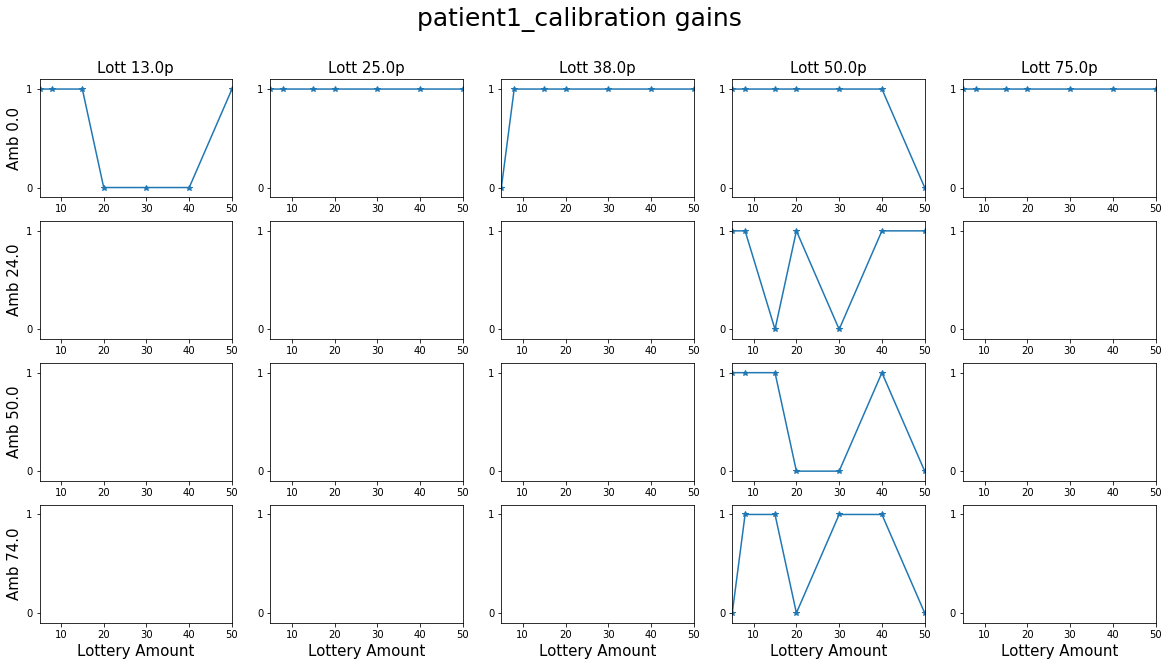

In [75]:
#Gains 

# split_dir defined above
#utility_dir defined at the beggining

#get set of all good data files for analysis
good_files = sorted(glob(os.path.join(split_dir, 'patient1_calibration/crdm/patient1_calibration_crdm.csv'))) #Modify thisss
if (not good_files):
  print("No good files available. Check file path.")
  sys.exit()

lott_p_lower_bound = [0,20,30,40,60]
lott_p_upper_bound = [20,30,40,60,80]
amb_lower_bound = [-1, 20, 40, 60]
amb_upper_bound = [20, 40, 60, 80]
ylabels = ['Amb 0.0','Amb 24.0', 'Amb 50.0', 'Amb 74.0']
titles = ['Lott 13.0p', 'Lott 25.0p','Lott 38.0p','Lott 50.0p','Lott 75.0p']

cols = ["lott_p", "amb_level", "sure_amt","lott_amt_choice", "frequency"]
lott_amt_choice_df = pd.DataFrame(columns=cols)

for i, subj_fn in enumerate(good_files):
  print(subj_fn)
  df = pd.read_csv(subj_fn)
  df['crdm_trial_resp.corr'] = 1.0 - df['crdm_trial_resp.corr']
  df['crdm_lott_amt'] = df['crdm_lott_top'] + df['crdm_lott_bot']
  df = df.loc[df['crdm_trial_type'] == 'task']

  plt.figure(i,figsize=(20,10))  

  #loop through each lottery-probability for each ambuiguity level
  for iimmed, (il,iu) in enumerate(zip(amb_lower_bound,amb_upper_bound)):
    for iplot,(lb,ub) in enumerate(zip(lott_p_lower_bound,lott_p_upper_bound)):
      index = 1+iplot+(5*iimmed)
      plt.subplot(4,5,index)
      x = []
      y = []
          
      idf = df.loc[(df['crdm_lott_p'] < ub) & (df['crdm_lott_p'] > lb) & (df['crdm_amb_lev'] < iu) & (df['crdm_amb_lev'] > il)]
      x = x + idf['crdm_lott_amt'].tolist()
      y = y + idf['crdm_trial_resp.corr'].tolist()
      
      lott_amt_choice, count = count_tuples(list(zip(x,y)))
      this_df = pd.DataFrame(columns=cols)
      this_df["frequency"] = count
      this_df["lott_amt_choice"] = lott_amt_choice
      this_df["lott_p"] = titles[iplot]
      this_df["amb_level"] = ylabels[iimmed]
      this_df["sure_amt"] = df['crdm_sure_amt'].unique()[0]
      lott_amt_choice_df = pd.concat([lott_amt_choice_df,this_df],ignore_index=True)


      if (not x):
        pass
      else:
        x,y = zip(*sorted(zip(x,y)))
      plt.plot(x,y,'*-')
      plt.ylim([-0.1,1.1])
      plt.xlim([5,df['crdm_lott_amt'].max()])
      plt.yticks([0, 1]) #Setting Y axis ticks to only 0 and 1
      if (iplot == 0):
        plt.ylabel(ylabels[iimmed],fontsize=15)
      if (iimmed == 0):
        plt.title(titles[iplot],fontsize=15)
      if (iimmed == 3):
        plt.xlabel("Lottery Amount",fontsize=15)
  
  subj = get_subject(subj_fn)

  fn = os.path.join(utility_dir,subj,'crdm/{}_crdm_delay_amt_choice.csv'.format(subj))
  print("Saving to: {}".format(fn))
  lott_amt_choice_df.to_csv(fn)
  print(lott_amt_choice_df)
  
  plt.suptitle("{} gains".format(subj), fontsize=25)
  fig_fn = os.path.join(utility_dir,subj,'crdm/{}_crdm_plot_delay_amt_choice_gain.png'.format(subj))
  print("Saving to: {}".format(fig_fn))
  plt.savefig(fig_fn)
  plt.show()

/Volumes/UCDN/Santiago_Guardo/data/split/patient1_calibration/crdm/patient1_calibration_crdm.csv
Saving to: /Volumes/UCDN/Santiago_Guardo/data/utility/patient1_calibration/crdm/patient1_calibration_crdm_delay_amt_choice.csv
         lott_p amb_level sure_amt lott_amt_choice frequency
0    Lott 13.0p   Amb 0.0     -5.0     (-5.0, 1.0)         1
1    Lott 13.0p   Amb 0.0     -5.0    (-15.0, 1.0)         1
2    Lott 13.0p   Amb 0.0     -5.0    (-20.0, 1.0)         1
3    Lott 13.0p   Amb 0.0     -5.0     (50.0, 1.0)         1
4    Lott 13.0p   Amb 0.0     -5.0    (-30.0, 1.0)         1
..          ...       ...      ...             ...       ...
107  Lott 50.0p  Amb 74.0     -5.0     (15.0, 1.0)         1
108  Lott 50.0p  Amb 74.0     -5.0    (-40.0, 0.0)         1
109  Lott 50.0p  Amb 74.0     -5.0     (20.0, 0.0)         1
110  Lott 50.0p  Amb 74.0     -5.0      (5.0, 0.0)         1
111  Lott 50.0p  Amb 74.0     -5.0    (-50.0, 1.0)         1

[112 rows x 5 columns]
Saving to: /Volumes/

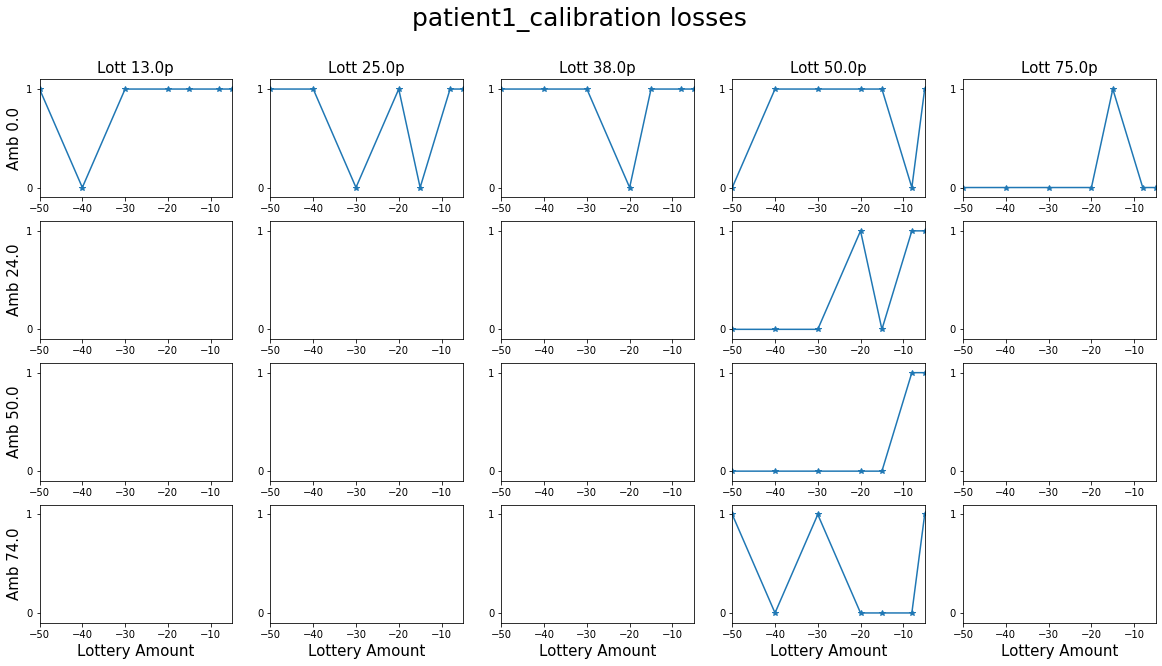

In [76]:
#losses 

# split_dir defined above
#utility_dir defined at the beggining

#get set of all good data files for analysis
good_files = sorted(glob(os.path.join(split_dir, 'patient1_calibration/crdm/patient1_calibration_crdm.csv'))) #Modify thisss
if (not good_files):
  print("No good files available. Check file path.")
  sys.exit()

lott_p_lower_bound = [0,20,30,40,60]
lott_p_upper_bound = [20,30,40,60,80]
amb_lower_bound = [-1, 20, 40, 60]
amb_upper_bound = [20, 40, 60, 80]
ylabels = ['Amb 0.0','Amb 24.0', 'Amb 50.0', 'Amb 74.0']
titles = ['Lott 13.0p', 'Lott 25.0p','Lott 38.0p','Lott 50.0p','Lott 75.0p']

cols = ["lott_p", "amb_level", "sure_amt","lott_amt_choice", "frequency"]
lott_amt_choice_df = pd.DataFrame(columns=cols)

for i, subj_fn in enumerate(good_files):
  print(subj_fn)
  df = pd.read_csv(subj_fn)
  df['crdm_trial_resp.corr'] = 1.0 - df['crdm_trial_resp.corr']
  df['crdm_lott_amt'] = df['crdm_lott_top'] + df['crdm_lott_bot']
  df = df.loc[df['crdm_trial_type'] == 'task']

  plt.figure(i,figsize=(20,10))  

  #loop through each lottery-probability for each ambuiguity level
  for iimmed, (il,iu) in enumerate(zip(amb_lower_bound,amb_upper_bound)):
    for iplot,(lb,ub) in enumerate(zip(lott_p_lower_bound,lott_p_upper_bound)):
      index = 1 +iplot+(5*iimmed)
      plt.subplot(4,5,index)
      x = []
      y = []
          
      idf = df.loc[(df['crdm_lott_p'] < ub) & (df['crdm_lott_p'] > lb) & (df['crdm_amb_lev'] < iu) & (df['crdm_amb_lev'] > il)]
      x = x + idf['crdm_lott_amt'].tolist()
      y = y + idf['crdm_trial_resp.corr'].tolist()
      
      lott_amt_choice, count = count_tuples(list(zip(x,y)))
      this_df = pd.DataFrame(columns=cols)
      this_df["frequency"] = count
      this_df["lott_amt_choice"] = lott_amt_choice
      this_df["lott_p"] = titles[iplot]
      this_df["amb_level"] = ylabels[iimmed]
      this_df["sure_amt"] = df['crdm_sure_amt'].unique()[0]
      lott_amt_choice_df = pd.concat([lott_amt_choice_df,this_df],ignore_index=True)


      if (not x):
        pass
      else:
        x,y = zip(*sorted(zip(x,y)))
      plt.plot(x,y,'*-')
      plt.ylim([-0.1,1.1])
      plt.xlim([df['crdm_lott_amt'].min(),-5])
      plt.yticks([0, 1]) #Setting Y axis ticks to only 0 and 1
      if (iplot == 0):
        plt.ylabel(ylabels[iimmed],fontsize=15)
      if (iimmed == 0):
        plt.title(titles[iplot],fontsize=15)
      if (iimmed == 3):
        plt.xlabel("Lottery Amount",fontsize=15)
  
  subj = get_subject(subj_fn)

  fn = os.path.join(utility_dir,subj,'crdm/{}_crdm_delay_amt_choice.csv'.format(subj))
  print("Saving to: {}".format(fn))
  lott_amt_choice_df.to_csv(fn)
  print(lott_amt_choice_df)
  
  plt.suptitle("{} losses".format(subj), fontsize=25)
  fig_fn = os.path.join(utility_dir,subj,'crdm/{}_crdm_plot_delay_amt_choice_loss.png'.format(subj))
  print("Saving to: {}".format(fig_fn))
  plt.savefig(fig_fn)
  plt.show()